# **Proyecto Automatidata**
**Curso 5 - Análisis de regresión: Simplificar relaciones complejas de datos**

La empresa de consultoría de datos Automatidata le ha contratado recientemente como nuevo miembro de su equipo de análisis de datos. Su cliente más reciente, la NYC Taxi and Limousine Commission (New York City TLC), quiere que el equipo de Automatidata construya un modelo de regresión lineal múltiple para predecir las tarifas de taxi utilizando los datos existentes que se recogieron en el transcurso de un año. El equipo está cada vez más cerca de completar el proyecto, después de haber completado un plan de acción inicial, el trabajo inicial de codificación Python, EDA, y las pruebas A / B.

El equipo de Automatidata ha revisado los resultados de las pruebas A/B. Ahora es el momento de trabajar en la predicción de los importes de las tarifas de taxi. Has impresionado a tus compañeros de Automatidata con tu trabajo duro y tu atención al detalle. El equipo de datos cree que estás listo para construir el modelo de regresión y poner al día al cliente New York City TLC sobre tus progresos.

Se ha estructurado y preparado un cuaderno para ayudarle en este proyecto. Por favor, complete las siguientes preguntas.

# Curso 5 Proyecto de fin de curso: Construir un modelo de regresión lineal múltiple

En esta actividad, construirás un modelo de regresión lineal múltiple. Como ya ha aprendido, la regresión lineal múltiple le ayuda a estimar la relación lineal entre una variable dependiente continua y dos o más variables independientes. Para los profesionales de la ciencia de datos, se trata de una habilidad útil porque permite considerar más de una variable frente a la variable que se está midiendo. Esto abre la puerta a la realización de análisis mucho más exhaustivos y flexibles. 

Completar esta actividad le ayudará a practicar la planificación y construcción de un modelo de regresión lineal múltiple basado en una necesidad empresarial específica. La estructura de esta actividad está diseñada para emular las propuestas que probablemente se le asignarán en su carrera como profesional de datos. Completar esta actividad le ayudará a prepararse para esos momentos profesionales.
<br/>

**El propósito** de este proyecto es demostrar conocimientos de EDA y de un modelo de regresión lineal múltiple.

**El objetivo** es construir un modelo de regresión lineal múltiple y evaluar el modelo
<br/>
*Esta actividad consta de tres partes:*

**Parte 1:** EDA y comprobación de los supuestos del modelo
* ¿Cuáles son algunos de los propósitos del EDA antes de construir un modelo de regresión lineal múltiple?

**Parte 2:** Construcción y evaluación del modelo
* ¿Qué recursos utiliza al completar esta etapa?

**Parte 3:** Interpretación de los resultados del modelo

* ¿Qué ideas clave se desprenden de su(s) modelo(s)?

* ¿Qué recomendaciones de negocio propones basándote en los modelos construidos?

# Construir un modelo de regresión lineal múltiple

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


A lo largo de estos cuadernos de proyecto, verás referencias al marco de resolución de problemas PACE. Los siguientes componentes del cuaderno están etiquetados con la etapa PACE correspondiente: Planificar, Analizar, Construir y Ejecutar.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Considere las preguntas de su Documento de Estrategia PACE para reflexionar sobre la fase del Plan.


### Tarea 1. Importación y carga
Importe los paquetes que ha aprendido que son necesarios para construir modelos de regresión lineal.

In [58]:
# Importaciones
# Paquetes para numéricos + marcos de datos
import pandas as pd
import numpy as np 

# Paquetes de visualización
import matplotlib.pyplot as plt 
import seaborn as sns

# Paquetes de conversión de fechas para calcular la duración de los viajes
from datetime import datetime  # trabajar con fechas y horas 
from datetime import date  # para fechas sin importar el formato sin tener en cuenta la información de la hora
from datetime import timedelta # representar la diferencia entre dos fechas o tiempos, restar o sumar 

# Paquetes para OLS, MLR, matriz de confusión
from sklearn.preprocessing import StandardScaler # utilizada para estandarizar características eliminando la media y escalando a la varianza unitaria.
from sklearn.model_selection import train_test_split # Realizar prueba y entrenamiento 
import sklearn.metrics as metrics # para la matrix de confision
from sklearn.linear_model import LinearRegression # para la regresuion lineal 
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

**Nota:** `Pandas` se utiliza para cargar el conjunto de datos NYC TLC. Como se muestra en esta celda, el conjunto de datos se ha cargado automáticamente. No es necesario descargar el archivo .csv ni proporcionar más código para acceder al conjunto de datos y continuar con este laboratorio. Por favor, continúe con esta actividad completando las siguientes instrucciones.

In [59]:
# cargar el conjunto de datos en el dataframe  
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

En esta etapa, considere la siguiente pregunta cuando corresponda para completar su respuesta en código:

* ¿Cuáles son algunos de los propósitos del EDA antes de construir un modelo de regresión lineal múltiple?


1.   Los valores atípicos y extremos de los datos pueden afectar significativamente a las ecuaciones de regresión lineal. 

2.   Las actividades de EDA también incluyen la identificación de datos faltantes para ayudar al analista a tomar decisiones sobre su exclusión o inclusión mediante la sustitución de valores con medias de conjuntos de datos, medianas y otros métodos similares.

3.   Es importante comprobar cosas como la multicolinealidad entre las variables predictoras, así como entender sus distribuciones, ya que esto ayudará a decidir qué inferencias estadísticas se pueden hacer a partir del modelo y cuáles no.

4.  Además, puede ser útil diseñar nuevas características multiplicando variables entre sí o tomando la diferencia de una variable con otra. Por ejemplo, en este conjunto de datos puede crear una variable "duración" restando "tpep_dropoff" de "tpep_pickup time".

### Tarea 2a. Explorar datos con EDA

Analice y descubra datos, buscando correlaciones, datos que faltan, valores atípicos y duplicados.

In [60]:
# Empieza con `.shape` y `.info()`
df=df0.copy()

print(df.shape)

print()
print(df.info())


(22699, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  fl

Compruebe si faltan datos o hay duplicados con `.isna()` y `.drop_duplicates()`.

In [61]:
# Buscar duplicados
print('Forma del conjunto de datos:', df.shape)
print('Forma del dataframe con los duplicados eliminados:', df.drop_duplicates().shape)

# Compruebe si faltan valores en el marco de datos
print('Recuento total de valores nulos:', df.isna().sum().sum())

# Mostrar valores faltantes por columna en el marco de datos
print('Valores perdidos por columna:')
df.isna().sum()

Forma del conjunto de datos: (22699, 18)
Forma del dataframe con los duplicados eliminados: (22699, 18)
Recuento total de valores nulos: 0
Valores perdidos por columna:


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [62]:
# Use .describe()
df.describe()


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Tarea 2b. Convertir las columnas de recogida y entrega en fecha-hora


In [63]:
#Comprueba el formato de los datos.
df["tpep_dropoff_datetime"][0]



'03/25/2017 9:09:47 AM'

In [64]:
# Convertir columnas datetime a datetime
# Mostrar tipos de datos de `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Tipo de datos de tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Tipo de datos de tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

# Convertir `tpep_pickup_datetime` a formato datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Convertir `tpep_dropoff_datetime` a formato datetime
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Mostrar tipos de datos de `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Tipo de datos de tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Tipo de datos de tpep_pickup_datetime:', df['tpep_dropoff_datetime'].dtype)

df.head(3)


Tipo de datos de tpep_pickup_datetime: object
Tipo de datos de tpep_dropoff_datetime: object
Tipo de datos de tpep_pickup_datetime: datetime64[ns]
Tipo de datos de tpep_pickup_datetime: datetime64[ns]


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75


### Tarea 2c. Crear columna de duración


Cree una nueva columna llamada `duración` que represente el número total de minutos que duró cada trayecto en taxi.

In [65]:
# Create `duration` column
df["duracion"]=(df["tpep_dropoff_datetime"]-df["tpep_pickup_datetime"])/np.timedelta64(1,'m')
df.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duracion
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


### Valores atípicos

Llame a `df.info()` para inspeccionar las columnas y decidir en cuáles comprobar los valores atípicos.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m


Teniendo en cuenta que muchas de las funciones no se utilizarán para adaptarse a su modelo, las columnas más importantes para comprobar si hay valores atípicos probablemente sean:
* `trip_distance`
* `fare_amount`
* `duration`

### Tarea 2d. Diagramas de caja

Traza un diagrama de caja para cada característica: `distancia_viaje`, `monto_tarifa`, `duración`.

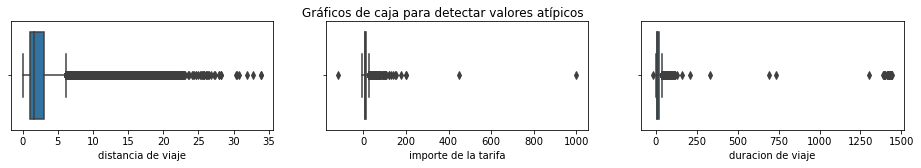

In [67]:
fig,axes=plt.subplots(1,3, figsize=(16,2))
fig.suptitle("Gráficos de caja para detectar valores atípicos")
sns.boxplot(ax=axes[0], x=df['trip_distance'])
sns.boxplot(ax=axes[1], x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['duracion'])
axes[0].set_xlabel("distancia de viaje")
axes[1].set_xlabel("importe de la tarifa")
axes[2].set_xlabel("duracion de viaje")
plt.show()



**Preguntas:** 
1. ¿Qué variable(s) contiene(n) valores atípicos? 

Todas las variables contienen valores atipicos 

2. ¿Son increíbles los valores de la columna `distancia_viaje`?

Hay 30 millas desde el extremo sur de Staten Island hasta el extremo norte de Manhattan y eso en línea recta. Con este conocimiento y la distribución de los valores en esta columna, es razonable dejar estos valores tranquilos y no alterarlos. Sin embargo, los valores de `fare_amount` y `duration` definitivamente parecen tener valores atípicos problemáticos en el extremo superior.

3. ¿Qué ocurre con el extremo inferior? ¿Tienen sentido las distancias, tarifas y duraciones de 0 (o valores negativos)?


Probablemente no para los dos últimos, pero para `trip_distance` podría estar bien.

### Tarea 2e. Imputaciones

#### `trip_distance` valores atípicos

Usted sabe por las estadísticas de resumen que hay distancias de viaje de 0. ¿Son éstas un reflejo de datos erróneos, o son viajes muy cortos que se redondean hacia abajo?

Para comprobarlo, ordene los valores de las columnas, elimine los duplicados e inspeccione los 10 valores más bajos. ¿Son valores redondeados o precisos?

In [68]:
df.trip_distance.describe()

count    22699.000000
mean         2.913313
std          3.653171
min          0.000000
25%          0.990000
50%          1.610000
75%          3.060000
max         33.960000
Name: trip_distance, dtype: float64

In [69]:
# ¿Se redondean hacia abajo las distancias de viaje de 0 datos erróneos o los viajes muy cortos?
sorted(set(df['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

Las distancias se capturan con un alto grado de precisión. Sin embargo, podría ser posible que los viajes tuvieran distancias de cero si un pasajero pidiera un taxi y luego cambiara de opinión. Además, ¿hay suficientes valores cero en los datos como para plantear un problema?

Calcule el recuento de viajes en los que la `distancia_viaje` es cero.

In [70]:
sum(df['trip_distance']==0) # se suman los valores que sean igual a 0

148

Hay 148 de ~23.000 viajes es relativamente insignificante. Se podría imputar con un valor de 0,01, pero es poco probable que tenga mucho efecto en el modelo. Por lo tanto, la columna `distancia_viaje` permanecerá intacta con respecto a los valores atípicos.

#### `fare_amount` valores atípicos

In [71]:
print("Valores menores a 0: ", sum(df["fare_amount"]<0))
print("Valores mayores a 200: ", sum(df["fare_amount"]>200))
df.fare_amount.describe()

Valores menores a 0:  14
Valores mayores a 200:  3


count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

**Pregunta:** ¿Qué observa en los valores de la columna `fare_amount`?

El rango de valores de la columna `fare_amount` es grande y los extremos no tienen mucho sentido.

* **Valores bajos:** Los valores negativos son problemáticos. Los valores de cero podrían ser legítimos si el taxi registró un viaje que se canceló inmediatamente.

* **Valores altos:** El importe máximo de la tarifa en este conjunto de datos es de casi \\$1,000 , lo que parece muy improbable. Los valores altos de esta característica pueden limitarse basándose en la intuición y la estadística. El rango intercuartílico (IQR) es de \\$8. La fórmula estándar de `Q3 + (1,5 * IQR)` da como resultado \$26,50. Eso parece apropiado para el importe máximo de la tarifa en este conjunto de datos. Esto no parece apropiado para la tarifa máxima. En este caso, utilizaremos un factor de `6`, que da como resultado un tope de 62,50$.

Impute los valores inferiores a $0 con `0`.

In [72]:
# Imputar valores inferiores a $0 con 0
df.loc[df['fare_amount'] < 0, 'fare_amount'] = 0
df['fare_amount'].min() #encontral valor mimino 

0.0

Impute ahora el valor máximo como `Q3 + (6 * IQR)`.

In [73]:
def outlier_imputer(lista_columnas, iqr_factor): # IQR ranfo intercuartil 
    '''
    Imputa valores de límite superior en columnas especificadas basándose en su rango intercuartílico.

    Argumentos:
        lista_columnas: Lista de columnas sobre las que iterar
        iqr_factor: Un número que representa x en la fórmula
                    Q3 + (x * IQR). Se utiliza para determinar el umbral máximo
                    a partir del cual un punto se considera un valor atípico.

    El IQR se calcula para cada columna de column_list y los valores que superan
    el umbral superior de cada columna se imputan con el valor del umbral superior.
    '''
    for col in lista_columnas:
        # Reasignar mínimo a cero
        df.loc[df[col] < 0, col] = 0  #Establecer valores negativos en col y se asigna 0

        # ¿calcular el umbral superior
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        umbral_superior = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('umbral_superior:', umbral_superior)

        # Reasignar valores > umbral a umbral
        df.loc[df[col] > umbral_superior, col] =umbral_superior
        print(df[col].describe())
        print()

In [74]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
umbral_superior: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



#### `duration` valores atipicos


In [75]:
# llamar a .describe() para los valores atípicos de duración
df["duracion"].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duracion, dtype: float64

La columna `duración` tiene valores problemáticos tanto en el extremo inferior como en el superior.

* **Valores bajos:** No debe haber valores que representen tiempo negativo. Impute todas las duraciones negativas con "0".

* **Valores altos:** Impute los valores altos de la misma manera que imputó los valores atípicos altos para las tarifas: `Q3 + (6 * IQR)`.

In [76]:
# Impute un 0 para cualquier valor negativo
df.loc[df['duracion'] < 0, 'duracion'] = 0
df['duracion'].min()

0.0

In [77]:
# Imputar los valores atípicos altos
outlier_imputer(['duracion'], 6)

duracion
q3: 18.383333333333333
umbral_superior: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duracion, dtype: float64



### Tarea 3a. Ingeniería de características

#### Crear columna `distancia_media`

Cuando se despliegue, el modelo no conocerá la duración de un viaje hasta después de que éste se produzca, por lo que no podrá entrenar un modelo que utilice esta característica. Sin embargo, puede utilizar las estadísticas de los viajes que *conoce* para generalizar sobre los que no conoce.

En este paso, cree una columna llamada `distancia_media` que capture la distancia media para cada grupo de viajes que comparten puntos de recogida y bajada.

Por ejemplo, si sus datos fueran

|Viaje|Inicio|final|Distancia|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

Los resultados deberían ser:
```
A -> B: 1,25 millas
C -> D: 2 millas
D -> C: 3 millas
```

Observe que C -> D no es lo mismo que D -> C. Todos los viajes que comparten un único par de puntos de inicio y final se agrupan y promedian.

Entonces, se añadirá una nueva columna `distancia_media` donde el valor en cada fila es la media de todos los viajes con esos puntos de recogida y entrega:

|Viaje|Inicio|Fin|Distancia|distancia_media|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Comience por crear una columna auxiliar llamada `pickup_dropoff`, que contiene la combinación única de ID de ubicación de recogida y entrega para cada fila.

Una forma de hacerlo es convertir los ID de los lugares de recogida y devolución en cadenas y unirlas, separadas por un espacio. El espacio es para garantizar que, por ejemplo, un viaje con puntos de recogida/devolución de 12 y 151 se codifique de forma diferente a un viaje con puntos 121 y 51. Así, la nueva columna tendría el siguiente aspecto

Así, la nueva columna tendría el siguiente aspecto:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [78]:
df.head(2)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duracion
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000


In [79]:
# Create `recoger dejar`  column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str) # se crea la columna y se asigna los valores en str 
df['pickup_dropoff'].head(5)

0    100 231
1     186 43
2    262 236
3     188 97
4      4 112
Name: pickup_dropoff, dtype: object

In [80]:
df.head(2)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duracion,pickup_dropoff
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43


Ahora, utilice una sentencia `groupby()` para agrupar cada fila por la nueva columna `pickup_dropoff`, calcule la media y capture los valores sólo en la columna `trip_distance`. Asigne los resultados a una variable llamada `grouped`.

In [81]:
agrupados=df.groupby("pickup_dropoff").mean(numeric_only=True)[["trip_distance"]]
agrupados.head(10)

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000
100 113,2.024000
100 114,1.940000
100 12,4.550000
100 125,2.840000


`grouped` es un objeto de la clase `DataFrame`.

1. Conviértalo en un diccionario utilizando el método [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html). 2. Asigna los resultados a una variable llamada `grouped_dict`. Esto resultará en un diccionario con una clave de `distancia_viaje` cuyos valores son otro diccionario. Las claves del diccionario interior son los puntos de recogida/devolución y sus valores son las distancias medias. Esta es la información que desea.

```
Ejemplo:
diccionario_agrupado = {'distancia_viaje': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reasigne el diccionario `grouped_dict` para que sólo contenga el diccionario interno. En otras palabras, deshacerse de `distancia_viaje` como clave, así:

```
Ejemplo:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [85]:
# 1. Convertir `grouped` en un diccionario
agrupados_dict = agrupados.to_dict()

# 2. Reasignar para que sólo contenga el diccionario interior
agrupados_dict =agrupados_dict['trip_distance']


1. Cree una columna `mean_distance` que sea una copia de la columna de ayuda `pickup_dropoff`.

2. Utilice el método [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) en la serie `mean_distance`. Pasa `grouped_dict` como argumento. Reasigna el resultado a la serie `mean_distance`.
</br></br>
Cuando se pasa un diccionario al método `Series.map()`, éste reemplazará los datos de la serie donde esos datos coincidan con las claves del diccionario. Los valores que se imputan son los valores del diccionario.

```
Example:
df['mean_distance']
```

|distancia_media |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|distancia_media |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

Cuando se utiliza de esta manera, el método `map()` `Series` es muy similar a `replace()`, sin embargo, tenga en cuenta que `map()` imputará `NaN` para cualquier valor en la serie que no tenga una clave correspondiente en el diccionario de mapeo, así que tenga cuidado.

In [86]:
# 1. Crear una columna mean_distance que sea una copia de la columna pickup_dropoff helper
df['distancia_media'] = df['pickup_dropoff']

# 2. Asignar `grouped_dict` a la columna `mean_distance
df['distancia_media'] = df['distancia_media'].map(agrupados_dict)

# Confirmar que funcionó
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['distancia_media']]

,distancia_media
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


#### Crear columna "duración_media"

Repita el proceso utilizado para crear la columna `distancia_media` para crear una columna `duración_media`.

In [87]:
agrupados=df.groupby("pickup_dropoff").mean(numeric_only=True)[["duracion"]]

# Crear un diccionario donde las claves sean pickup_dropoffs únicos y los valores sean
# duración media del viaje para todos los viajes con esas combinaciones pickup_dropoff
agrupados_dict = agrupados.to_dict()
agrupados_dict = agrupados_dict["duracion"]

df['duracion_media'] = df['pickup_dropoff']
df['duracion_media'] = df['duracion_media'].map(agrupados_dict)

# Confirmar que funcionó
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['duracion_media']]

,duracion_media
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


#### Crear columnas `day` y `month`

Crea dos nuevas columnas, `day` (nombre del día) y `month` (nombre del mes) extrayendo la información relevante de la columna `tpep_pickup_datetime`.

In [88]:
# Create 'day' col
df["dia"]=df['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' col
df["mes"]=df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

#### Crear columna `rush_hour` (hora_rápida)

Defina hora punta como:
* Cualquier día laborable (no sábado ni domingo) Y
* A partir de las 06:00&ndash;10:00 o a partir de las 16:00&ndash;20:00

Cree una columna binaria `rush_hour` que contenga un 1 si el trayecto se realizó durante la hora punta y un 0 si no fue así.

In [89]:
# Crear cloluma 'rush_hour'
df['hora_rapida'] = df['tpep_pickup_datetime'].dt.hour

# Si el día es sábado o domingo, imputar 0 en la columna `rush_hour
df.loc[df['dia'].isin(['saturday', 'sunday']), 'hora_rapida'] = 0

In [90]:
def hora_pico_trafico(hora):  # se define la funcion
    if 6 <= hora['hora_rapida'] < 10:
        val = 1
    elif 16 <= hora['hora_rapida'] < 20:
        val = 1
    else:
        val = 0
    return val

In [91]:
# Aplica la función `rush_hourizer()` a la nueva columna
df.loc[(df.dia != 'saturday') & (df.dia != 'sunday'), 'hora_rapida'] = df.apply(hora_pico_trafico, axis=1)
df.head()


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duracion,pickup_dropoff,distancia_media,duracion_media,dia,mes,hora_rapida
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr,0


### Tarea 4. Gráfico de dispersión

Cree un gráfico de dispersión para visualizar la relación entre `duración_media` y `fare_amount`.

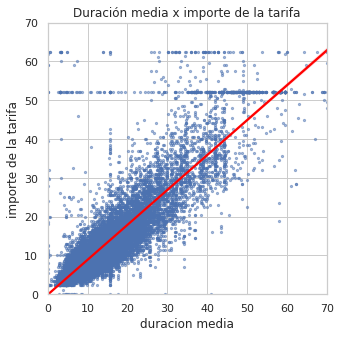

In [92]:
# Crear un gráfico de dispersión para visualizar la relación entre las variables de interés.sns.set(style='whitegrid')
sns.set(style='whitegrid') # configiurar estilo de fondo
f = plt.figure() # crear marco
f.set_figwidth(5) # establecer tamaño
f.set_figheight(5)
ax=sns.regplot(x=df['duracion_media'], y=df['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Duración media x importe de la tarifa')
ax.set_xlabel("duracion media")
ax.set_ylabel("importe de la tarifa")
plt.show()

La variable `duración_media` se correlaciona con la variable objetivo. Pero, ¿qué son las líneas horizontales alrededor de los importes de las tarifas de 52 dólares y 63 dólares? ¿Cuáles son los valores y cuántos hay?

Ya sabes lo que representa una de las líneas. 62 dólares y 50 céntimos es el máximo que se imputó para los valores atípicos, por lo que todos los valores atípicos anteriores tendrán ahora importes de tarifa de 62,50 dólares. ¿Cuál es la otra línea?

Compruebe el valor de los viajes en la segunda línea horizontal del diagrama de dispersión.


La variable está correlacionada con la variable objetivo. Pero, ¿cuáles son las líneas horizontales alrededor de los importes de las tarifas de 52 y 63 $? ¿Cuáles son los valores y cuántos hay?

Ya sabes lo que representa una de las líneas. 62 dólares y 50 centavos es el máximo que se imputó para los valores atípicos, por lo que todos los valores atípicos anteriores tendrán ahora importes de tarifa de 62,50 dólares. ¿Cuál es la otra línea?

Comprueba el valor de los viajes en la segunda línea horizontal del diagrama de dispersión.

In [93]:
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head(10)

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
51.0      7
60.0      6
55.0      6
51.5      6
53.0      4
Name: fare_amount, dtype: int64

Hay 514 viajes cuyas tarifas eran \$52.

Examine los 30 primeros de estos viajes.

In [94]:
# Configurar pandas para que muestre todas las columnas
pd.set_option('display.max_columns', None)
df[df['fare_amount']==52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duracion,pickup_dropoff,distancia_media,duracion_media,dia,mes,hora_rapida
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,mar,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,jun,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,nov,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,dec,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,sep,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,tuesday,feb,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,jun,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,thursday,aug,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,tuesday,sep,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,sunday,apr,0


**Pregunta:** ¿Qué notas sobre los primeros 30 viajes?

Parece que casi todos los viajes en las primeras 30 filas donde el monto de la tarifa era \$52 comienzan o terminan en la ubicación 132, y todos tienen un "RatecodeID" de 2.

No hay ninguna razón evidente por la que PULocation 132 deba tener tantas tarifas de 52 dólares. Parecen ocurrir en días diferentes, en momentos diferentes, con ambos proveedores, en todos los meses. Sin embargo, hay muchos peajes de $5,76 y \\$5,54. Esto parecería indicar que la ubicación 132 se encuentra en un área que frecuentemente requiere peajes para ir y venir. Es probable que esto sea un aeropuerto.


El diccionario de datos dice que "RatecodeID" de 2 indica viajes para JFK, que es el Aeropuerto Internacional John F. Kennedy. Una búsqueda rápida en Google de "tarifa fija de taxi de la ciudad de Nueva York \$52" indica que en 2017 (el año en que se recopilaron estos datos) efectivamente había una tarifa fija para los viajes en taxi entre el aeropuerto JFK (en Queens) y Manhattan.

Debido a que "RatecodeID" se conoce a partir del diccionario de datos, los valores de este código de tarifa se pueden volver a imputar a los datos después de que el modelo haga sus predicciones. De esta manera sabrás que esos puntos de datos siempre serán correctos.

### Tarea 5. Aislar variables de modelado

Elimine las funciones que sean redundantes, irrelevantes o que no estarán disponibles en un entorno implementado.

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [97]:
df2 = df.copy()

df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duracion',
               'pickup_dropoff', 'dia', 'mes'
               ], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   distancia_media  22699 non-null  float64
 4   duracion_media   22699 non-null  float64
 5   hora_rapida      22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


### Tarea 6. Gráfico de pares

Cree un diagrama de pares para visualizar las relaciones por pares entre `fare_amount`, `mean_duration` y `mean_distance`.

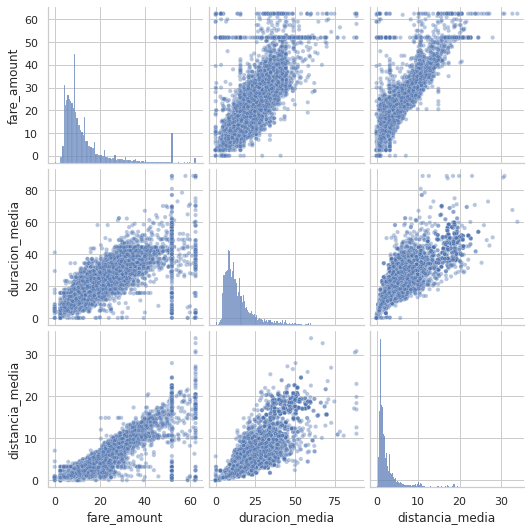

In [98]:
# Crear un pairplot para visualizar las relaciones por pares entre las variables de los datos
sns.pairplot(df2[['fare_amount', 'duracion_media', 'distancia_media']],
             plot_kws={'alpha':0.4, 'size':5},
             );


Todas estas variables muestran una correlación lineal entre sí. Investiga esto más a fondo.

### Tarea 7. Identificar correlaciones

A continuación, codifique una matriz de correlaciones para ayudar a determinar las variables más correlacionadas.

In [99]:
# Matriz de correlaciones para ayudar a determinar las variables más correlacionadas
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,distancia_media,duracion_media,hora_rapida
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
distancia_media,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
duracion_media,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
hora_rapida,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


Visualice un mapa térmico de correlación de los datos.

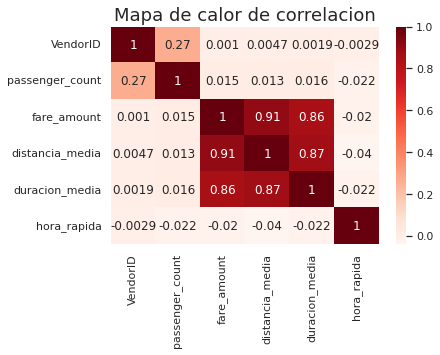

In [100]:
# Crear un mapa de calor de correlación
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Mapa de calor de correlacion',
          fontsize=18)
plt.show()

**Pregunta:** ¿Qué variable(s) están correlacionadas con la variable objetivo de `fare_amount`? 

Tanto `duración_media` como `distancia_media` están altamente correlacionadas con la variable objetivo (`fare_amount` )`importe_tarifa` También están correlacionadas entre sí, con una correlación de Pearson de 0,87.



**NOTA** Recuerde que las variables predictoras altamente correlacionadas pueden ser perjudiciales para los modelos de regresión lineal cuando se desea poder realizar inferencias estadísticas sobre los datos a partir del modelo. Sin embargo, las variables predictoras correlacionadas pueden utilizarse para crear un predictor preciso si la predicción en sí es más importante que utilizar el modelo como herramienta para aprender sobre los datos.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

Tras el análisis y la obtención de variables con relaciones estrechas, es hora de empezar a construir el modelo. Considere las preguntas de su Documento de Estrategia PACE para reflexionar sobre la etapa de Construcción.


### Tarea 8a. Dividir los datos en variable de resultado y características

In [101]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   distancia_media  22699 non-null  float64
 4   duracion_media   22699 non-null  float64
 5   hora_rapida      22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


Establezca sus variables X e y. X representa las características e y representa la variable de resultado (objetivo).

In [105]:
# Eliminar la columna de destino de las características
# X = df2.drop(columns='importe_tarifa')
X = df2.drop(columns=['fare_amount'])

# Establecer variable y
y = df2[['fare_amount']]

# Visualizar las primeras filas

X.head()

,VendorID,passenger_count,distancia_media,duracion_media,hora_rapida
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


### Tarea 8b. Preprocesamiento de datos


Los dummy codifican variables categóricas

In [106]:
# Convertir VendorID a cadena
X['VendorID'] = X['VendorID'].astype(str)

# Obtén dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,distancia_media,duracion_media,hora_rapida,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


In [109]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  22699 non-null  int64  
 1   distancia_media  22699 non-null  float64
 2   duracion_media   22699 non-null  float64
 3   hora_rapida      22699 non-null  int64  
 4   VendorID_2       22699 non-null  uint8  
dtypes: float64(2), int64(2), uint8(1)
memory usage: 731.6 KB


### Dividir los datos en conjuntos de entrenamiento y de prueba

Cree conjuntos de entrenamiento y de prueba. El conjunto de prueba debe contener el 20% del total de muestras. Establecer `random_state=0`.

In [110]:
# Crear conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### Normalizar los datos

Use `StandardScaler()`, `fit()`, y `transform()` para normalizar la `X_train` variables. Asigna los resultados a una variable llamada `X_train_scaled`.

In [111]:
# Normalizar las variables X
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X entrenamiento escalado:', X_train_scaled)

X entrenamiento escalado: [[-0.50301524  0.8694684   0.17616665 -0.64893329  0.89286563]
 [-0.50301524 -0.60011281 -0.69829589  1.54099045  0.89286563]
 [ 0.27331093 -0.47829156 -0.57301906 -0.64893329 -1.11998936]
 ...
 [-0.50301524 -0.45121122 -0.6788917  -0.64893329 -1.11998936]
 [-0.50301524 -0.58944763 -0.85743597  1.54099045 -1.11998936]
 [ 1.82596329  0.83673851  1.13212101 -0.64893329  0.89286563]]


### Ajustar el modelo

Instancie su modelo y ajústelo a los datos de entrenamiento.

In [112]:
# Ajusta tu modelo a los datos de entrenamiento
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Tarea 8c. Evaluar el modelo

### Entrenar datos

Evalúe el rendimiento de su modelo calculando la suma de cuadrados residuales y la puntuación de la varianza explicada (R^2). Calcule el error medio absoluto, el error medio cuadrático y el error medio cuadrático.

In [115]:
# Evaluar el rendimiento del modelo con los datos de entrenamiento
r_sq = lr.score(X_train_scaled, y_train)
print('Coeficiente de determinación:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('error medio absoluto (MAE):', mean_absolute_error(y_train, y_pred_train))
print('error medio cuadrado (MSE):', mean_squared_error(y_train, y_pred_train))
print('Error cuadrático medio (RMSE):',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coeficiente de determinación: 0.8398434585044773
R^2: 0.8398434585044773
error medio absoluto (MAE): 2.186666416775414
error medio cuadrado (MSE): 17.88973296349268
Error cuadrático medio (RMSE): 4.229625629236313



### Datos de prueba

Calcule las mismas métricas en los datos de prueba. Recuerde escalar los datos `X_prueba` utilizando el escalador que se ajustó a los datos de entrenamiento. No vuelva a ajustar el escalador a los datos de prueba, sólo transfórmelos. Llame a los resultados  `X_test_scaled`.

In [116]:
# Escala los datos de X_test
X_test_scaled = scaler.transform(X_test)

In [117]:
# Evaluar el rendimiento del modelo en los datos de prueba
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coeficiente de determinación:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('error medio absoluto MAE:', mean_absolute_error(y_test,y_pred_test))
print('error medio cuadrado MSE:', mean_squared_error(y_test, y_pred_test))
print('Error cuadrático medio RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coeficiente de determinación: 0.8682583641795454
R^2: 0.8682583641795454
error medio absoluto MAE: 2.1336549840593864
error medio cuadrado MSE: 14.326454156998944
Error cuadrático medio RMSE: 3.785030271609323


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Considere las preguntas de su Documento de Estrategia PACE para reflexionar sobre la etapa Ejecutar.

### Tarea 9a. Resultados

Utilice la celda de código siguiente para obtener los valores `actual`, `predicted` y `residual` para el conjunto de pruebas, y almacénelos como columnas en un marco de datos `results`.

In [118]:
# Create a `results` dataframe

results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()


,actual,predicted,residual
5818,14.0,12.356503,1.643497
18134,28.0,16.314595,11.685405
4655,5.5,6.726789,-1.226789
7378,15.5,16.227206,-0.727206
13914,9.5,10.536408,-1.036408


### Tarea 9b. Visualizar los resultados del modelo

Create a scatterplot to visualize `actual` vs. `predicted`.

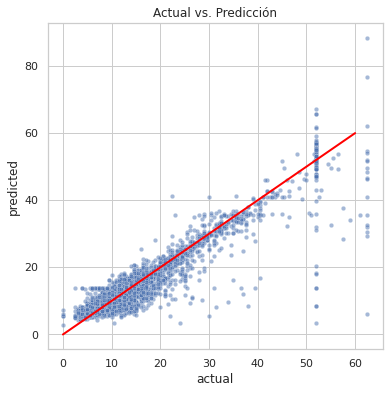

In [120]:
# Crear un gráfico de dispersión para visualizar `predicted` sobre `actual`.
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Dibuja una línea x=y para mostrar cuáles serían los resultados si el modelo fuera perfecto
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. Predicción');

Visualice la distribución de los `residuos` mediante un histograma.

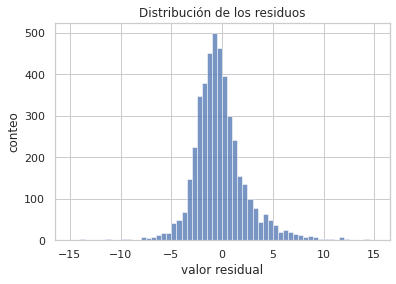

In [122]:
# Visualizar la distribución de los `residuos`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribución de los residuos')
plt.xlabel('valor residual')
plt.ylabel('conteo');



In [123]:
# Calculate residual mean
results['residual'].mean()

-0.01544262152868053

La distribución de los residuos es aproximadamente normal y tiene una media de -0,015. Los residuos representan la varianza de la variable de resultado que no explica el modelo. Una distribución normal en torno a cero es buena, ya que demuestra que los errores del modelo están distribuidos uniformemente y son insesgados.


Crear un gráfico de dispersión de `residuals` over `predicted`.

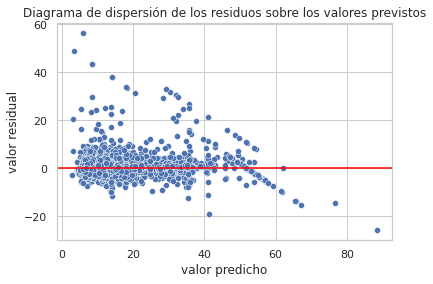

In [124]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Diagrama de dispersión de los residuos sobre los valores previstos')
plt.xlabel('valor predicho')
plt.ylabel('valor residual')
plt.show()

Los residuos del modelo se distribuyen uniformemente por encima y por debajo de cero, con la excepción de las líneas inclinadas de la esquina superior izquierda a la esquina inferior derecha, que usted sabe que son el máximo imputado de 62,50 $ y la tarifa plana de 52 $ para los viajes al aeropuerto JFK.

### Tarea 9c. Coeficientes

Utilice el atributo `coef_` para obtener los coeficientes del modelo. Los coeficientes se muestran en el orden de las características que se utilizaron para entrenar el modelo. ¿Qué característica tiene el mayor efecto sobre el precio del viaje?

In [125]:
# Obtener coeficientes del modelo
coeficientes = pd.DataFrame(lr.coef_, columns=X.columns)
coeficientes 

,passenger_count,distancia_media,duracion_media,hora_rapida,VendorID_2
0,0.030825,7.133867,2.812115,0.110233,-0.054373


Los coeficientes revelan que `distancia_media` fue la característica con mayor peso en la predicción final del modelo. ¡Atención! Una interpretación errónea común es que por cada milla recorrida, el importe de la tarifa aumenta una media de 7,13 $. Esto es incorrecto. Recuerde que los datos utilizados para entrenar el modelo fueron estandarizados con `StandardScaler()`. Como tal, las unidades ya no son millas. En otras palabras, no se puede decir "por cada milla recorrida...", como se indicó anteriormente. La interpretación correcta de este coeficiente es: controlando otras variables, *por cada cambio de +1 en la desviación estándar*, el importe de la tarifa aumenta una media de \$7,13. 

Obsérvese también que, al no haberse eliminado algunas características altamente correlacionadas, el intervalo de confianza de esta evaluación es más amplio.

Por lo tanto, traduzcamos esto a millas en lugar de a desviación típica (es decir, desescalemos los datos). 

1. Calcule la desviación estándar de `distancia_media` en los datos de `entrenamientoX`.

2. Divida el coeficiente (7,133867) por el resultado para obtener una interpretación más intuitiva.

In [128]:
# 1. Calcular la DE de `distancia_media` en los datos de X_entrenamiento
print(X_train['distancia_media'].std())

# 2. Dividir el coeficiente del modelo por la desviación típica
print(7.133867 / X_train['distancia_media'].std())

3.574812975256415
1.9955916713344426


¿Qué significan estos coeficientes? ¿Cómo deben interpretarse?

Ahora puede hacer una interpretación más intuitiva: por cada 3,57 millas recorridas, la tarifa aumentó una media de \\7,13 $. O, reducido: por cada 1 milla recorrida, la tarifa aumentó una media de \\$2,00.

### Tarea 9d. Conclusión

**Respuestas ejemplares
**¿Cuáles son los puntos clave de este cuaderno?**

* La regresión lineal múltiple es una herramienta poderosa para estimar una variable dependiente continua a partir de varias variables independientes.
* El análisis exploratorio de datos es útil para seleccionar características numéricas y categóricas para la regresión lineal múltiple.
* El ajuste de modelos de regresión lineal múltiple puede requerir ensayo y error para seleccionar variables que se ajusten a un modelo preciso, manteniendo al mismo tiempo los supuestos del modelo (o no, dependiendo de su caso de uso).

**¿Qué resultados se pueden presentar a partir de este cuaderno?**

* Puede discutir el cumplimiento de los supuestos de regresión lineal, y puede presentar las puntuaciones MAE y RMSE obtenidas del modelo.



**¡Felicidades!** Has completado este laboratorio. Sin embargo, es posible que no veas una marca de verificación verde junto a este elemento en la plataforma de Coursera. Por favor, continúa tu progreso independientemente de la marca de verificación. Simplemente haga clic en el icono "guardar" en la parte superior de este cuaderno para asegurarse de que su trabajo ha sido registrado. 